# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

ANIME RECOMMENDATION DATASET: 

Who: The primary audience includes anime enthusiasts, data scientists, and recommendation system devs who are interested in understanding anime preferences and improving recommendation algorithms. Anime is a huge market and has millions of consumers (at least 300 million as per a 2020 survey) and so there will be a part of the audience who are not that engrossed with data and purely concerned with the consumption of this media/art form. In such cases, data scientists are to be expected, perhaps more so given the nature of the huge fanbase that anime has and the vast and diverse demographic that it offers. Additionally, streaming services or anime hosting websites might also be interested in such dataset analyses. 

What: The dataset contains info about various anime titles and user ratings. The key goal is to analyze anime popularity, genre trends, and user rating behaviors to develop better recommendation algorithms or gain insights into anime viewer preferences.

How: To effectively communicate insights, utilize clear visualizations such as bar charts for genre popularity, heatmaps for user rating distributions, and network graphs to depict relationships between different anime titles. All that can be ultimately used to deduce and develop a working recommendation system for related anime via machine learning algoritms. 

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
anime_df = pd.read_csv("archive/anime.csv")
rating_df = pd.read_csv("archive/rating.csv")

# with ChatGPT's generativeAi for assistance:

# 1. Summarize the datasets
print("Anime Dataset Info:")
print(anime_df.info())
print("\nAnime Dataset Summary:")
print(anime_df.describe())

# above and following was done and learnt in hw1

print("\nRating Dataset Info:")
print(rating_df.info())
print("\nRating Dataset Summary:")
print(rating_df.describe())

# 2. Check for duplicate rows
print("\nDuplicate rows in anime dataset:", anime_df.duplicated().sum())
print("Duplicate rows in rating dataset:", rating_df.duplicated().sum())

# 3. Check for duplicate values in specific columns
print("\nDuplicate values in anime_id column of anime dataset:", anime_df['anime_id'].duplicated().sum())

# 4. Calculate mean, median, and mode for numerical columns
numeric_cols = anime_df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    print(f"\nColumn: {col}")
    print(f"Mean: {anime_df[col].mean()}")
    print(f"Median: {anime_df[col].median()}")
    print(f"Mode: {anime_df[col].mode()[0]}")

# 5. Check for missing/null values
print("\nMissing values in anime dataset:\n", anime_df.isnull().sum())
print("\nMissing values in rating dataset:\n", rating_df.isnull().sum())

# 6. Handling missing values (Example: Filling with mean or dropping)
anime_df.fillna(anime_df.mean(), inplace=True)  # Fill numeric missing values with column mean
rating_df.dropna(inplace=True)  # Drop rows with missing values in ratings

# 7. Identify inconsistent data (e.g., invalid values)
print("\nChecking for inconsistent data...")
# Example: Checking if rating values are outside expected range (1-10 or -1 for 'not rated')
invalid_ratings = rating_df[(rating_df['rating'] < -1) | (rating_df['rating'] > 10)]
print("Invalid ratings:\n", invalid_ratings)

# 8. Encode categorical variables (One-hot encoding for genre column)
anime_df_encoded = pd.get_dummies(anime_df, columns=['genre'], drop_first=True)

# 9. Check for class imbalance in genres
print("\nClass distribution in anime genres (Top 10):")
print(anime_df['genre'].value_counts().head(10))


FileNotFoundError: [Errno 2] No such file or directory: 'archive/anime.csv'

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

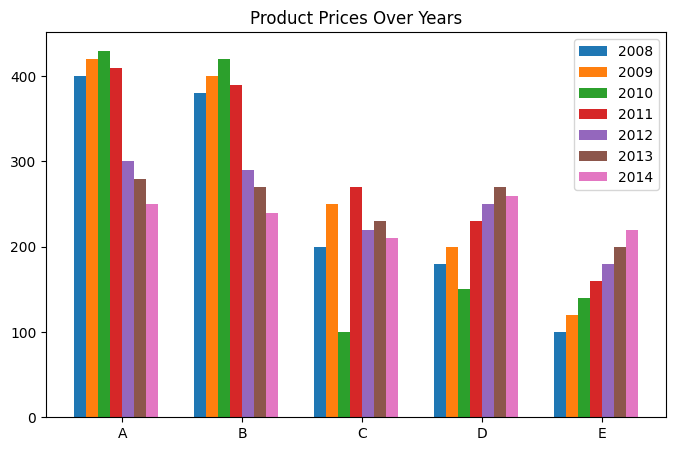

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Basic data for rough approximation
products = ["A", "B", "C", "D", "E"]
years = ["2008", "2009", "2010", "2011", "2012", "2013", "2014"]

# Rough height values (not exact)
values = [
    [400, 420, 430, 410, 300, 280, 250],  # Product A
    [380, 400, 420, 390, 290, 270, 240],  # Product B
    [200, 250, 100, 270, 220, 230, 210],  # Product C
    [180, 200, 150, 230, 250, 270, 260],  # Product D
    [100, 120, 140, 160, 180, 200, 220],  # Product E
]

bar_width = 0.1
x = np.arange(len(products))

# Plot bars
plt.figure(figsize=(8, 5))
for i in range(len(years)):
    plt.bar(x + i * bar_width, [values[j][i] for j in range(len(products))], 
            width=bar_width, label=years[i])

# Labels and basic styling
plt.xticks(x + (bar_width * len(years)) / 2, products)
plt.title("Product Prices Over Years")
plt.legend()

plt.show()
